# 🧮 Notebook Probabilidad Empresarial

Este cuaderno explora conceptos de probabilidad aplicados a estrategias empresariales, usando Python paso a paso sin necesidad de conocimientos previos.


## ✅ 1. Organización y Representación de la Información Probabilística

Generamos datos aleatorios simulando la aplicación de 5 diferentes estrategias empresariales, cada una con la cantidad de días que fue exitosa.

Note que la suma total de los días exitosos es de 100.

In [1]:
import pandas as pd

data = {
    'Estrategia': ['A', 'B', 'C', 'D', 'E'],
    'Dias_Exito': [28, 22, 18, 20, 12]
}
df = pd.DataFrame(data)
df['Probabilidad'] = df['Dias_Exito'] / df['Dias_Exito'].sum()
df

,Estrategia,Dias_Exito,Probabilidad
0,A,28,0.28
1,B,22,0.22
2,C,18,0.18
3,D,20,0.20
4,E,12,0.12


## ✅ 2. Visualización de Probabilidades: Tablas y Gráficos

Visualizamos qué estrategia tiene más probabilidad de ser exitosa.

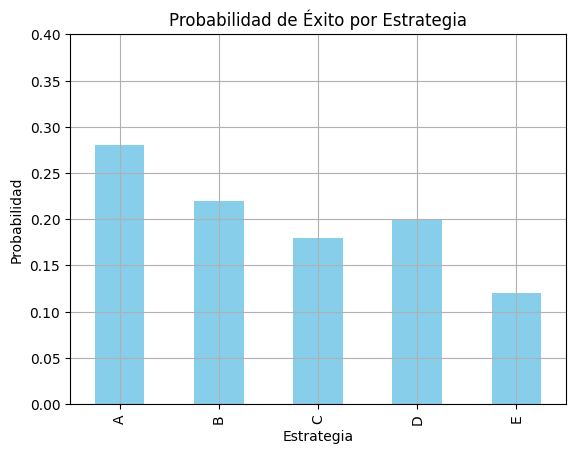

In [2]:
import matplotlib.pyplot as plt

df.plot(x='Estrategia', y='Probabilidad', kind='bar', legend=False, color='skyblue')
plt.title('Probabilidad de Éxito por Estrategia')
plt.ylabel('Probabilidad')
plt.xlabel('Estrategia')
plt.ylim(0, 0.4)
plt.grid(True)
plt.show()

## ✅ 3. Cálculo de Eventos Compuestos y Complementarios

A manera de ejemplo, extraemos únicamente las probabilidades de 3 estrategias: A, B y E.

Calculamos la probabilidad de que aplicar la estrategia A **o** la estrategia B (`P(A∪B)`) y la probabilidad de **NO** aplicar la estrategia E `(P(¬E)`)

In [9]:
p_a = df[df['Estrategia'] == 'A']['Probabilidad'].values[0]
p_b = df[df['Estrategia'] == 'B']['Probabilidad'].values[0]
p_e = df[df['Estrategia'] == 'E']['Probabilidad'].values[0]

p_a_o_b = p_a + p_b
p_no_e = 1 - p_e

print(f"P(A) = {p_a:.2f}")
print(f"P(B) = {p_b:.2f}")
print(f"P(A ∪ B) = {p_a_o_b:.2f}")
print(f"P(¬ E) = {p_no_e:.2f}")

P(A) = 0.28
P(B) = 0.22
P(A ∪ B) = 0.50
P(¬ E) = 0.88


**Explicación:**

* `df[df['Estrategia'] == 'A']`: filtra la fila de la estrategia A.

* `['Probabilidad'].values[0]`: extrae el valor de probabilidad.

* `p_a_o_b = p_a + p_b`: suma de probabilidades de A o B (eventos mutuamente excluyentes).

* `p_no_e = 1 - p_e`: calcula el complemento de la probabilidad de E.

## ✅ 4. Medidas de Tendencia Central sobre Distribuciones de Probabilidad

Calculamos valores estadísticos

In [4]:
from statistics import mean, median, mode

exitos = df['Dias_Exito'].tolist()
media = mean(exitos)
mediana = median(exitos)
moda = mode(exitos)

print(f"Media (días de éxito): {media}")
print(f"Mediana (días de éxito): {mediana}")
print(f"Moda (días de éxito): {moda}")

Media (días de éxito): 20
Mediana (días de éxito): 20
Moda (días de éxito): 28


**Explicación:**

`from statistics import ...`: importa funciones para calcular estadísticas.

`df['Dias_Exito'].tolist()`: convierte la columna de días en una lista.

`mean(exitos)`: media aritmética → promedio de días de éxito.

`median(exitos)`: mediana → valor central cuando están ordenados.

`mode(exitos)`: moda → valor que más se repite.

Esto permite entender la distribución de los datos. Si media ≈ mediana ≈ moda, los datos están equilibrados.

## ✅ 5. Extra: Probabilidad Condicional

Según la tabla del inicio, sabemos que hubo **50 días destacados** en los que la empresa tuvo un buen desempeño general. De esos 50 días, **15** correspondieron a la **estrategia A**.

Dado que sabemos que un día fue uno de los mejores 50, ¿cuál es la probabilidad de que ese día exitoso haya sido por la estrategia A?

In [5]:
# Probabilidad condicional
p_a_dado_mejores = 15 / 50
print(f"P(A | Mejores días) = {p_a_dado_mejores:.2f}")

P(A | Mejores días) = 0.30


**Explicación:**

* Calcula la probabilidad de que un día exitoso haya sido por la estrategia A, dado que se sabe que fue uno de los mejores 50 días.

* Se interpreta como:

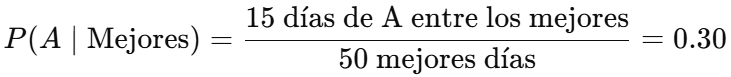

Esta probabilidad responde a la expresión *cuando las cosas van bien para la empresa, ¿con qué frecuencia se debe al uso de la estrategia A?*

## ✅ Ejercicio en clase: Comparación de las estrategias A y B, dentro de los mejores días

Utilizamos diagramas de Venn para poder observar mejor la distribución de los días exitosos de las estrategias A y B.

In [ ]:
!pip install matplotlib-venn

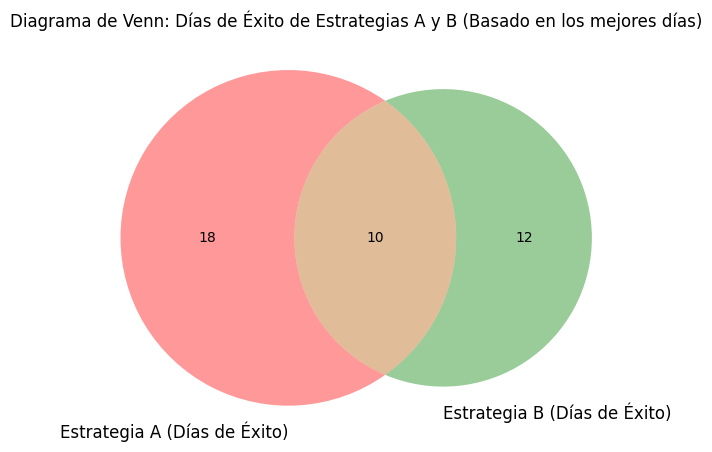

In [10]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Los días de éxito para las estrategias A y B
dias_exito_A = df[df['Estrategia'] == 'A']['Dias_Exito'].values[0]
dias_exito_B = df[df['Estrategia'] == 'B']['Dias_Exito'].values[0]

# Supongamos un número de días en común donde ambas estrategias fueron exitosas.
# Este valor no está en el DataFrame original, así que lo inventamos para el ejemplo del diagrama de Venn.
# Debe ser menor o igual al mínimo de dias_exito_A y dias_exito_B.
dias_en_comun_A_B = 10 # Ejemplo: 10 días donde ambas A y B tuvieron éxito

# Calcular los días de éxito solo para A y solo para B
solo_A = dias_exito_A - dias_en_comun_A_B
solo_B = dias_exito_B - dias_en_comun_A_B

# Asegurarse de que los valores no sean negativos
solo_A = max(0, solo_A)
solo_B = max(0, solo_B)
dias_en_comun_A_B = max(0, dias_en_comun_A_B)

# Si la suma de solo_A, solo_B y dias_en_comun_A_B es mayor que el total de días considerados (50),
# ajustar los valores para que el diagrama sea representativo de los "mejores días".
# En el ejemplo original se mencionan 50 días destacados.
total_mejores_dias = 50
suma_dias = solo_A + solo_B + dias_en_comun_A_B

# Ajustar si es necesario para que la suma total en el Venn sea <= total_mejores_dias
# Esto es una simplificación, ya que el dataframe original usa un total_dias de 28+22+18+20+12 = 100,
# mientras que la sección de probabilidad condicional usa 50 mejores días.
# Usaremos los 50 mejores días como el universo para el diagrama de Venn.

# Los valores para el diagrama de Venn son:
# (solo_A, solo_B, en_comun)
venn_data = (solo_A, solo_B, dias_en_comun_A_B)

# Crear el diagrama de Venn
plt.figure(figsize=(7, 7))
venn2(subsets=venn_data, set_labels=('Estrategia A (Días de Éxito)', 'Estrategia B (Días de Éxito)'))

plt.title('Diagrama de Venn: Días de Éxito de Estrategias A y B (Basado en los mejores días)')
plt.show()

# Explicación:
# El diagrama de Venn visualiza la superposición de los días de éxito entre las estrategias A y B,
# dentro del contexto de los "mejores días".
# - La sección a la izquierda representa los días donde solo la estrategia A fue exitosa.
# - La sección a la derecha representa los días donde solo la estrategia B fue exitosa.
# - La sección central (intersección) representa los días donde ambas estrategias A y B fueron exitosas.
# Los valores usados (solo_A, solo_B, dias_en_comun_A_B) se calculan a partir de los días de éxito
# de cada estrategia y un valor supuesto de días en común, ajustados para un total de 50 "mejores días"
# si la suma excede este total.


Según el diagrama anterior, responsda las siguientes preguntas en términos de probabilidad:

1. ¿Cuál estrategia estuvo más presente en los días exitosos?

2. ¿Con qué frecuencia se usaron juntas?

3. ¿Cuál tiene mayor probabilidad condicional dentro del subconjunto de “mejores días”?

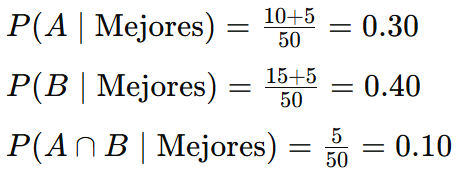